## Đồ án cuối kỳ - Lập trình cho Khoa học Dữ liệu

|Danh sách thành viên|MSSV|
|---|---|
|Đào Quốc Phong|18120505|
|Hồ Hoàng Duy|19120207|


Link thùng chứa: [git](https://github.com/daoquocphong3/DS_final)

## Thu thập dữ liệu

Dữ liệu trong đồ án lần này là về Phân tích Tính cách của Khách hàng (link [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)). Đây là một phân tích chi tiết về những khách hàng lý tưởng của một công ty. Nó giúp doanh nghiệp hiểu rõ hơn về khách hàng của mình và giúp họ dễ dàng sửa đổi sản phẩm theo nhu cầu, hành vi và mối quan tâm cụ thể của các loại khách hàng khác nhau.

Thông qua việc phân tích tính cách khách hàng giúp doanh nghiệp sửa đổi sản phẩm của mình dựa trên khách hàng mục tiêu từ các loại phân khúc khách hàng khác nhau. Ví dụ: thay vì chi tiền để tiếp thị một sản phẩm mới cho mọi khách hàng trong cơ sở dữ liệu của công ty, một công ty có thể phân tích phân khúc khách hàng nào có nhiều khả năng mua sản phẩm nhất và sau đó chỉ tiếp thị sản phẩm trên phân khúc cụ thể đó.

Data được cung cấp bởi Dr. Omar Romero-Hernandez. 

## Import các thư viện cơ bản

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

## Khám phá dữ liệu
### Đọc dữ liệu đầu vào

In [2]:
customer_df = pd.read_csv("marketing_campaign.csv", sep="\t")
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
customer_df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### Bộ dữ liệu có bao nhiêu hàng và cột?

In [4]:
num_rows, num_cols = customer_df.shape
print('Dữ liệu có {} dòng và {} cột'.format(num_rows, num_cols))

Dữ liệu có 2240 dòng và 29 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng là chi tiết thông tin của một khách hàng được thu thập. Có vẻ không có dòng nào có ý nghĩa khác.

### Dữ liệu có dòng nào bị trùng không?

In [5]:
duplicated_rows = customer_df.duplicated()
num_duplicated_rows = len(customer_df[duplicated_rows])
print("Có {} dòng bị lặp.".format(num_duplicated_rows))

Có 0 dòng bị lặp.


### Mỗi cột có ý nghĩa gì?

Dưới đây là mô tả ý nghĩa của các cột trong file `marketing_campaign.csv`:   

*People*

ID: Customer's unique identifier ID khách hàng (duy nhất)  
Year_Birth: Customer's birth year (Năm sinh của khách hàng)  
Education: Customer's education level (Trình độ học vấn của khách hàng)  
Marital_Status: Customer's marital status (Tình trạng hôn nhân của khách hàng)  
Income: Customer's yearly household income (Thu nhập hộ gia đình của khách hàng)  
Kidhome: Number of children in customer's household (Số lượng trẻ con trong gia đình)  
Teenhome: Number of teenagers in customer's household (Số lượng trẻ thành niên trong gia đình)  
Dt_Customer: Date of customer's enrollment with the company (Ngày KH đăng ký thành viên)  
Recency: Number of days since customer's last purchase (Số ngày kể từ lần mua hàng gần nhất)  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise (1 nếu có phàn nàn trong vòng 2 năm gần đây, 0 nếu ngược lại)  

*Products*

MntWines: Amount spent on wine in last 2 years (Số tiền chi cho rượu trong vòng 2 năm gần đây)  
MntFruits: Amount spent on fruits in last 2 years (Số tiền chi cho trái cây trong vòng 2 năm gần đây)  
MntMeatProducts: Amount spent on meat in last 2 years (Số tiền chi cho thịt trong vòng 2 năm gần đây)  
MntFishProducts: Amount spent on fish in last 2 years (Số tiền chi cho cá trong vòng 2 năm gần đây)  
MntSweetProducts: Amount spent on sweets in last 2 years (Số tiền chi cho đồ ngọt trong vòng 2 năm gần đây)  
MntGoldProds: Amount spent on gold in last 2 years (Số tiền chi cho vàng trong vòng 2 năm gần đây)  

*Promotion*

NumDealsPurchases: Number of purchases made with a discount (Số lần mua hàng có giảm giá)  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

*Place*

NumWebPurchases: Number of purchases made through the company’s website (Số lần mua hàng qua website công ty)  
NumCatalogPurchases: Number of purchases made using a catalogue (Số lần mua hàng bằng catalogue)  
NumStorePurchases: Number of purchases made directly in stores (Số lần mua hàng trực tiếp ở cửa hàng)  
NumWebVisitsMonth: Number of visits to company’s website in the last month (Số lần truy cập website công ty trong tháng trước)  


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào cần thay đổi kiểu dữ liệu không?

In [6]:
col_dtypes = customer_df.dtypes
col_dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Ta thấy có 3 cột có kiểu dữ liệu là `object` là: `Education`, `Marital_Status`, `Dt_Customer`. Quan sát vài bộ dữ liệu thì ta có thể đoán cột `Education` và `Marital_Status` có kiểu dữ liệu `str` và thuộc dạng categorical, cột `Dt_Customer` có dạng "Ngày tháng năm". Các cột còn lại có dạng numerical

Để khẳng định 3 cột có kiểu `object` có kiểu dữ liệu là `str` ta viết hàm `open_object_dtype` (tương tự `HW3`):

In [7]:
def open_object_dtype(s):
    dtypes = set()
    for i in s:
        dtypes.add(type(i))
    return dtypes

In [8]:
#TEST
assert open_object_dtype(customer_df['Education']) == {str}
assert open_object_dtype(customer_df['Marital_Status']) == {str}
assert open_object_dtype(customer_df['Dt_Customer']) == {str}

Cột `Dt_Customer` đang biểu diễn dạng `Datetime` nên ta cần chuyển cột này từ `str` về `datetime`

## Tiền xử lý

Ta nhận thấy 2 cột `Z_CostContact` và `Z_Revenue` đều có độ lệch chuẩn = 0 và mỗi cột chỉ có duy nhất 1 giá trị nên ta có thể tiến hành bỏ đi 2 cột này

In [9]:
customer_df.drop('Z_CostContact',axis=1,inplace=True)
customer_df.drop('Z_Revenue',axis=1,inplace=True)
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


Trong bảng dữ liệu này có khá nhiều các cột gần tương tự nhau, ta có thể tạo một cột mới để gộp tổng các giá trị các cột này rồi sẽ bỏ các cột đó đi để bảng dữ liệu trở nên gọn hơn.   

### Cột `Year_Birth`:


Đầu tiên ta sẽ nội suy cột năm sinh `Year_Birth` thành cột tuổi `Age` để dễ dàng trong việc kết luận.

In [10]:
customer_df['Age'] = 2021 - customer_df['Year_Birth']

Hầu hết các dòng có giá trị từ 1940 trở lên tức là tầm 81 tuổi trở xuống.  
Có một vài dòng có giá trị là nhỏ hơn 1940 vd như 1899 là khoảng hơn 100 tuổi, con số này có vẻ không đúng lắm. Thực hiện xoá tất cả các năm sinh nhỏ hơn 1940.

In [11]:
deleteidx  = customer_df.loc[customer_df['Year_Birth'] < 1940].index
customer_df = customer_df.drop(deleteidx)

### Cột `Education`:

Ở cột này có giá trị lạ '2n Cycle'. Theo tìm hiểu trên [Education Degree](https://www.uab.cat/web/study/graduate/uab-master-s-degrees-and-graduate-diplomas/what-are-the-differences-between-a-master-s-degree-and-a-graduate-diploma-1345705451834.html) thì đây là một nhóm bằng, và một trong số đó có bằng Master. Nói cách khác thì nó là bằng sau đại học. Nhóm bằng này chia ra 3 loại là: Master's degrees, Graduate Diplomas (bằng sau đại học), và Specialisation courses. Thường bằng Master phải học nhiều hơn, lâu hơn. 2n Cycle chỉ đại diện cho 2 văn bằng còn lại nên theo thứ tự thì em sẽ sắp Master cao hơn 2n Cycle.  
Ngoài ra dữ liệu không có gì bất thường ở cột này.


In [12]:
customer_df['Education'].value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

### Cột `Marital_Status`:

In [13]:
customer_df['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Có 2 giá trị `Absurd` và `YOLO` và ngoại lai, tổng cộng gòm 4 dòng. Tiến hành xoá các dòng này.

Ta chuyển hóa cột này về chỉ còn 2 giá trị: 
- `InRelationship` (gồm `Married` và `Together`) 
- `Single` (gồm `Single` (trong bảng dữ liệu cũ), `Divorced`, `Widow`, `Alone`)

In [14]:
customer_df  = customer_df[customer_df['Marital_Status'] != 'YOLO']

customer_df = customer_df[customer_df['Marital_Status'] != 'Absurd']

customer_df['Marital_Status'] = customer_df['Marital_Status'].replace(['Married', 'Together'], 'InRelationship')

customer_df['Marital_Status'] = customer_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

In [15]:
customer_df['Marital_Status'].value_counts()

InRelationship    1443
Single             790
Name: Marital_Status, dtype: int64

### Các cột khác

Nhập cột `Kidhome` và `Teenhome` lại thành cột `Kids`

Tính tổng số lượng mua tất cả các mặc hàng và lưu vào cột `Expenses`

Tính tổng số lượng tham gia chiến dịch, lưu dữ liệu vào cột `TotaleAcceptedCmp`

Tính tổng số lượt mua hàng, lưu vào cột `NumTotalPurchases`

In [16]:
# Kidhome + Teenhome = Kids
customer_df['Kids'] = customer_df['Kidhome'] + customer_df['Teenhome']
# MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds = Expenses
customer_df['Expenses'] = customer_df['MntWines'] + customer_df['MntFruits'] + customer_df['MntMeatProducts'] + customer_df['MntFishProducts'] + customer_df['MntSweetProducts'] + customer_df['MntGoldProds']
# AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response = TotalAcceptedCmp
customer_df['TotalAcceptedCmp'] = customer_df['AcceptedCmp1'] + customer_df['AcceptedCmp2'] + customer_df['AcceptedCmp3'] + customer_df['AcceptedCmp4'] + customer_df['AcceptedCmp5'] + customer_df['Response']
# NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumDealsPurchases = NumTotalPurchases
customer_df['NumTotalPurchases'] = customer_df['NumWebPurchases'] + customer_df['NumCatalogPurchases'] + customer_df['NumStorePurchases'] + customer_df['NumDealsPurchases']

### Xóa các cột để giảm số chiều của dữ liệu

In [17]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4", "AcceptedCmp5", "Response", 
           "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases", 
           "Kidhome", "Teenhome",'Year_Birth']
customer_df = customer_df.drop(columns=col_del,axis=1)

### Đổi vị trí các columns cho dễ nhìn

In [18]:
new_columns = ['ID', 'Age', 'Education', 'Marital_Status', 'Income','Kids', 'Expenses',
         'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer','Recency',
       'NumWebVisitsMonth', 'Complain',   
       'TotalAcceptedCmp', 'NumTotalPurchases']
customer_df = customer_df.reindex(columns = new_columns)
customer_df

,ID,Age,Education,Marital_Status,Income,Kids,Expenses,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dt_Customer,Recency,NumWebVisitsMonth,Complain,TotalAcceptedCmp,NumTotalPurchases
0,5524,64,Graduation,Single,58138.0,0,1617,635,88,546,172,88,88,04-09-2012,58,7,0,1,25
1,2174,67,Graduation,Single,46344.0,2,27,11,1,6,2,1,6,08-03-2014,38,5,0,0,6
2,4141,56,Graduation,InRelationship,71613.0,0,776,426,49,127,111,21,42,21-08-2013,26,4,0,0,21
3,6182,37,Graduation,InRelationship,26646.0,1,53,11,4,20,10,3,5,10-02-2014,26,6,0,0,8
4,5324,40,PhD,InRelationship,58293.0,1,422,173,43,118,46,27,15,19-01-2014,94,5,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,InRelationship,61223.0,1,1341,709,43,182,42,118,247,13-06-2013,46,5,0,0,18
2236,4001,75,PhD,InRelationship,64014.0,3,444,406,0,30,0,0,8,10-06-2014,56,7,0,1,22
2237,7270,40,Graduation,Single,56981.0,0,1241,908,48,217,32,12,24,25-01-2014,91,6,0,1,19
2238,8235,65,Master,InRelationship,69245.0,1,843,428,30,214,80,30,61,24-01-2014,8,3,0,0,23


### Xử lý cột Dt_Customer:

Chuyển `dtype` của cột `Dt_Customer` sang kiểu dữ liệu thời gian:

Xem thử có khách hàng nào đăng ký trong vòng 2 năm qua (tức khách hàng hoạt động chưa được 2 năm), điều này có thể ảnh hưởng tới số lượng mua của khách hàng ở những cột sau.  
Không có khách hàng nào đăng ký tài khoản thành viên trong 2 năm qua.

In [19]:
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'], format='%d-%m-%Y')

In [20]:
# TEST 
# Nếu dtype của cột "Date" đã được chuyển sang datetime thì phải dùng được .dt.
assert customer_df['Dt_Customer'].dt.year.min() == 2012

## Khám phá dữ liệu (tiếp tục)

Ta thấy cột `Income` là cột duy nhất có giá trị thiếu.

In [21]:
num_of_missing_income = customer_df['Income'].isnull().sum()
print(f'Có {num_of_missing_income} dòng có giá trị thiếu')

Có 24 dòng có giá trị thiếu


Do tỷ lệ mẫu thiếu khá nhỏ so với tổng thể nên trong đồ án này, nhóm sẽ tiến hành bỏ các dòng thiếu thông tin cột `Income` đi.

In [22]:
customer_df = customer_df.dropna(axis=0)
customer_df

,ID,Age,Education,Marital_Status,Income,Kids,Expenses,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dt_Customer,Recency,NumWebVisitsMonth,Complain,TotalAcceptedCmp,NumTotalPurchases
0,5524,64,Graduation,Single,58138.0,0,1617,635,88,546,172,88,88,2012-09-04,58,7,0,1,25
1,2174,67,Graduation,Single,46344.0,2,27,11,1,6,2,1,6,2014-03-08,38,5,0,0,6
2,4141,56,Graduation,InRelationship,71613.0,0,776,426,49,127,111,21,42,2013-08-21,26,4,0,0,21
3,6182,37,Graduation,InRelationship,26646.0,1,53,11,4,20,10,3,5,2014-02-10,26,6,0,0,8
4,5324,40,PhD,InRelationship,58293.0,1,422,173,43,118,46,27,15,2014-01-19,94,5,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,InRelationship,61223.0,1,1341,709,43,182,42,118,247,2013-06-13,46,5,0,0,18
2236,4001,75,PhD,InRelationship,64014.0,3,444,406,0,30,0,0,8,2014-06-10,56,7,0,1,22
2237,7270,40,Graduation,Single,56981.0,0,1241,908,48,217,32,12,24,2014-01-25,91,6,0,1,19
2238,8235,65,Master,InRelationship,69245.0,1,843,428,30,214,80,30,61,2014-01-24,8,3,0,0,23


### Xử lý ngoại lai (outlier)

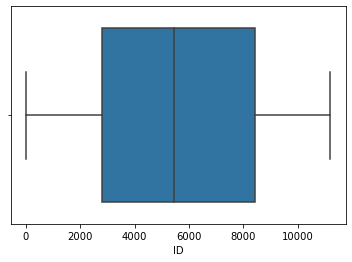

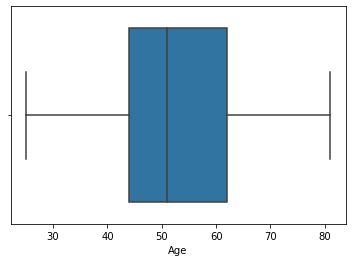

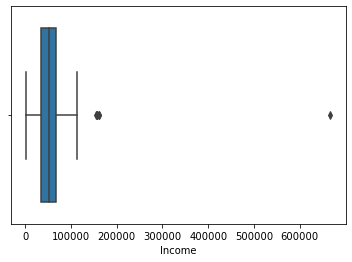

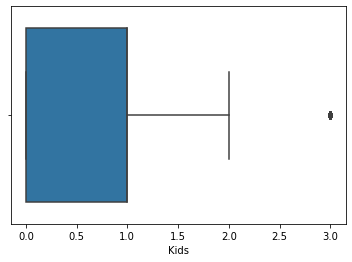

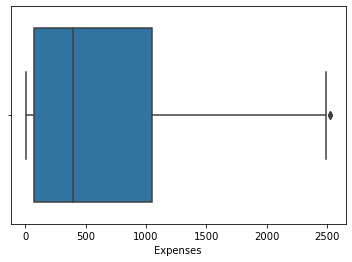

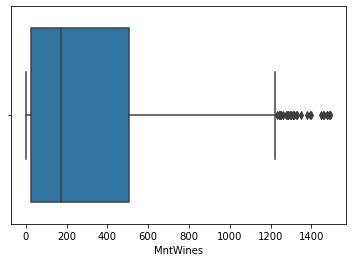

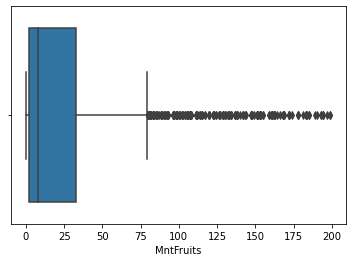

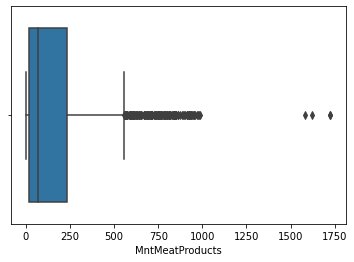

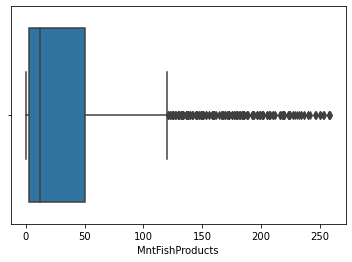

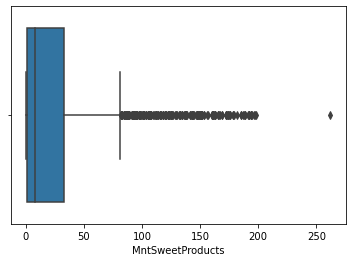

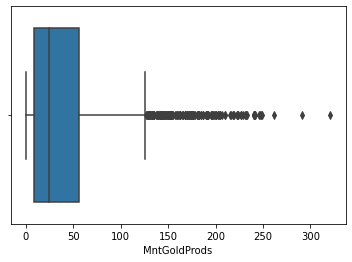

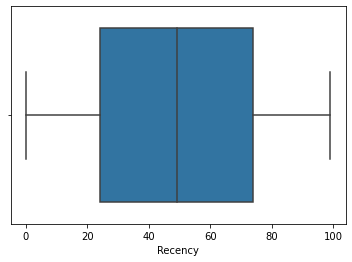

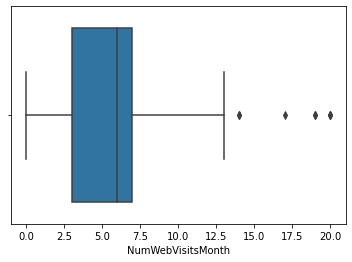

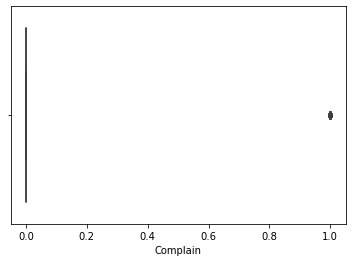

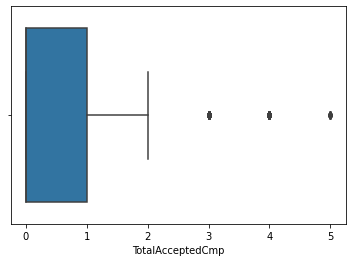

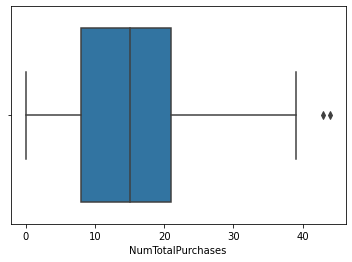

In [23]:
def detect_outliers(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.boxplot(frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.boxplot(frame[i])
            plt.show()
            
detect_outliers(customer_df)

Cột `Income` có các giá trị trải từ 1730 tới 666666. Gần 90% thu nhập có giá trị từ 20000 tới 85000, đây là khoảng ta tập trung khai thác, những giá trị ngoài khoảng này sẽ được coi là outlier. Tiến hành xoá các dòng outlier.

In [24]:
lowidx = customer_df.loc[customer_df['Income'] <20000].index
customer_df = customer_df.drop(lowidx)

highidx = customer_df.loc[customer_df['Income'] >85000].index
customer_df = customer_df.drop(highidx)

customer_df.Income.describe()

count     1985.000000
mean     52234.516373
std      17765.724053
min      20130.000000
25%      37070.000000
50%      51876.000000
75%      67225.000000
max      84953.000000
Name: Income, dtype: float64

Ta tìm tỷ lệ phân bố các cột numeric: dựa vào giá trị các cột có kiểu dữ liệu `int64` hoặc `float64` ta có thể nhận ra các cột thực chất là numeric gồm: `Age`, `Income`, `Kids`, `Dt_Customer`, `Recency`, `Expenses`, `NumTotalPurchases`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumWebVisitsMonth` với 3 dòng `Missing Ratio`, `Min`, `Max`

In [25]:
# init numpy matrix
nume_col_profiles_df = pd.DataFrame(np.ones((0,0)))
# calculate 'Dt_Customer' and 'Year_Birth' first
# nume_col_profiles_df['Dt_Customer'] =[(customer_df['Dt_Customer'].isnull().sum() * 100 / len(customer_df)).round(3), customer_df['Dt_Customer'].min(), customer_df['Dt_Customer'].max()]
# nume_col_profiles_df['Year_Birth'] =[(customer_df['Year_Birth'].isnull().sum() * 100 / len(customer_df)).round(3), customer_df['Year_Birth'].min(), customer_df['Year_Birth'].max()]

nume_col = ['Age', 'Income', 'Kids', 'Dt_Customer', 'Recency', 'Expenses', 'NumWebVisitsMonth', 
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumTotalPurchases']
for col in nume_col:
    nume_col_profiles_df[col]= [(customer_df[col].isnull().sum() * 100 / len(customer_df)).round(3), 
                                customer_df[col].min(), 
                                customer_df[col].mean() if col != 'Dt_Customer' else 0,
                                customer_df[col].max()]
nume_col_profiles_df.rename(index={0: "Missing Ratio", 1: "Min", 2: "Mean", 3: "Max"}, inplace = True)
nume_col_profiles_df

,Age,Income,Kids,Dt_Customer,Recency,Expenses,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumTotalPurchases
Missing Ratio,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Min,26.000000,20130.000000,0.000000,2012-07-30 00:00:00,0.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,4.00000
Mean,52.673048,52234.516373,0.987406,0,49.009572,595.517884,5.327456,304.997985,25.883627,156.748615,37.186902,26.278086,44.42267,15.05995
Max,81.000000,84953.000000,3.000000,2014-06-29 00:00:00,99.000000,2486.000000,10.000000,1493.000000,199.000000,984.000000,259.000000,198.000000,249.00000,39.00000


Ta tìm tỷ lệ phân bố các cột categorical: `ID`, `Education`, `Marital_Status`, `TotalAcceptedCmp`, `Complain` với 3 dòng `Missing Ratio`, `num_diff_vals`, `diff_vals`

In [26]:
cate_col_profiles_df = pd.DataFrame(np.ones((0,0)))
cate_col = ['ID', 'Education', 'Marital_Status', 'TotalAcceptedCmp', 'Complain']
for col in cate_col:
    cate_col_profiles_df[col]= [(customer_df[col].isnull().sum() * 100 / len(customer_df)).round(3), 
                                customer_df[col].value_counts().shape[0], 
                                list(customer_df[col].value_counts().index)]
cate_col_profiles_df.rename(index={0: "Missing Ratio", 1: "num_diff_vals", 2: "diff_vals"}, inplace = True)
cate_col_profiles_df

,ID,Education,Marital_Status,TotalAcceptedCmp,Complain
Missing Ratio,0.0,0.0,0.0,0.0,0.0
num_diff_vals,1985,5,2,6,2
diff_vals,"[0, 6798, 4785, 10928, 2730, 2620, 2724, 8867,...","[Graduation, PhD, Master, 2n Cycle, Basic]","[InRelationship, Single]","[0, 1, 2, 3, 4, 5]","[0, 1]"


### EDA

In [27]:
#Average Spending on Wines
wine_spent = customer_df.groupby("Kids").mean()['MntWines']
wine_spent

Kids
0    485.332685
1    283.880698
2    144.478261
3    138.530612
Name: MntWines, dtype: float64

In [28]:
#Average Spending on Fruits
fruit_spent = customer_df.groupby("Kids").mean()['MntFruits']
fruit_spent

Kids
0    52.573930
1    20.337536
2     7.938619
3     5.795918
Name: MntFruits, dtype: float64

In [29]:
#Average Spending on Meat Products
meat_spent = customer_df.groupby("Kids").mean()['MntMeatProducts']
meat_spent

Kids
0    359.383268
1    100.628516
2     51.102302
3     54.979592
Name: MntMeatProducts, dtype: float64

In [30]:
#Average Spending on Fish Products
fish_spent = customer_df.groupby("Kids").mean()['MntFishProducts']
fish_spent

Kids
0    79.245136
1    27.709990
2    10.913043
3     5.061224
Name: MntFishProducts, dtype: float64

In [31]:
#Average Spending on Sweet Products
sweet_spent = customer_df.groupby("Kids").mean()['MntSweetProducts']
sweet_spent

Kids
0    52.626459
1    20.894277
2     8.480818
3     5.183673
Name: MntSweetProducts, dtype: float64

In [32]:
#Average Spending on Gold Products
gold_spent = customer_df.groupby("Kids").mean()['MntGoldProds']
gold_spent

Kids
0    66.412451
1    42.081474
2    24.976982
3    18.183673
Name: MntGoldProds, dtype: float64

### Nhận xét sau khi khám phá:
Những người/gia đình chưa có con sẽ chi nhiều hơn cho các mặt hàng, khi có con thì việc chi tiêu sẽ giảm đi.

## Đưa ra các câu hỏi có ý nghĩa để trả lời

Dựa vào data đã được xử lý, ta có thể rút trích 1 số câu hỏi sau:   


### Câu hỏi 1:


Giả sử nhóm người dùng được phân loại như sau: thanh niên (<= 35 tuổi), trung niên (36-60 tuổi), người cao tuổi (>60 tuổi) thì tập khách hàng nào có sức mua lớn nhất? Với mỗi nhóm khách hàng như vậy thì sản phẩm nào có sức mua cao hơn cả?  
-> Trả lời được câu hỏi này giúp chúng ta hiểu hơn về nhóm tuổi khách hàng nào là khách hàng thân thiết của công ty, và mỗi nhóm tuổi đó tìm hiểu về thói quen mua hàng của họ, sản phẩm nào của công ty được họ quan tâm nhất, sản phẩm nào là ít được quan tâm. Từ đó đưa ra nhận xét, chiến lược để đáp ứng nhu cầu của học, cũng như thay đổi chiến lược đối với các sản phẩm ít được khách hàng quan tâm.

Các bước trả lời câu hỏi:
- Bước 1: Chia dataframe thành 3 dataframe nhỏ theo từng độ tuổi, youth: từ 35 tuổi trở xuống, middle: từ 36 đến 60 tuổi, old: từ 61 tuổi trở lên
- Bước 2: Vẽ biểu đồ tròn thể hiện tỉ lệ các nhóm tuổi trong dataframe.
- Bước 3: Đối với mỗi nhóm tuổi, tính tổng số tiền mà khách hàng đã dùng để mua từng loại sản phẩm.
- Bước 4: Vẽ biểu đồ so sánh tỉ lệ mua của từng nhóm tuổi đối với từng loại sản phẩm.

In [33]:
youth = len(customer_df[customer_df['Age'] <= 35])
youth

139

In [34]:
middle = len(customer_df[(customer_df['Age'] >= 36) & (customer_df['Age'] <= 60)])
middle

1286

In [35]:
old = len(customer_df[customer_df['Age'] > 60])
old

560

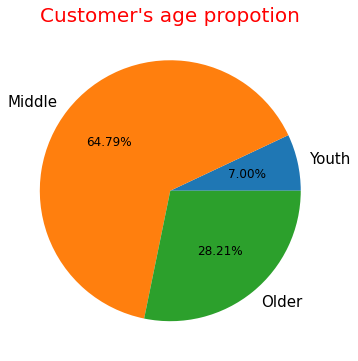

In [36]:
y = np.array([youth, middle, old])
mylabels = ["Youth", "Middle", "Older"]

plt.figure(figsize = (6,6))
wedges, labels, autopct = plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.setp(labels, fontsize = 15)
plt.setp(autopct, fontsize = 12)
plt.title("Customer's age propotion", fontsize = 20, color = 'r')
plt.show() 

In [37]:
prods = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

x_pos = np.arange(6)
width = 0.25

def barplot(df,name,num):
    diff_product = {}
    for prod in prods:
        diff_product[prod] = df[prod].sum()
    diff_prod = list(diff_product.keys())
    counts = list(diff_product.values())
    s = sum(counts)
    for i in range(len(counts)):
        counts[i] = (counts[i] / s).round(3)

    pos = x_pos + width*num
    plt.bar(pos, counts, width, label = name)
    # plt.xticks(diff_prod)
    # plt.ylabel(f'{name}')
    plt.ylim(0, 0.6)
    for i in range(len(counts)):
        plt.text(pos[i]-0.11, counts[i]+0.008,  str(counts[i]))
youth_customer_df = customer_df[customer_df['Age'] <= 35]
middle_customer_df = customer_df[(customer_df['Age'] >= 36) & (customer_df['Age'] <= 60)]
old_customer_df = customer_df[customer_df['Age'] > 60]

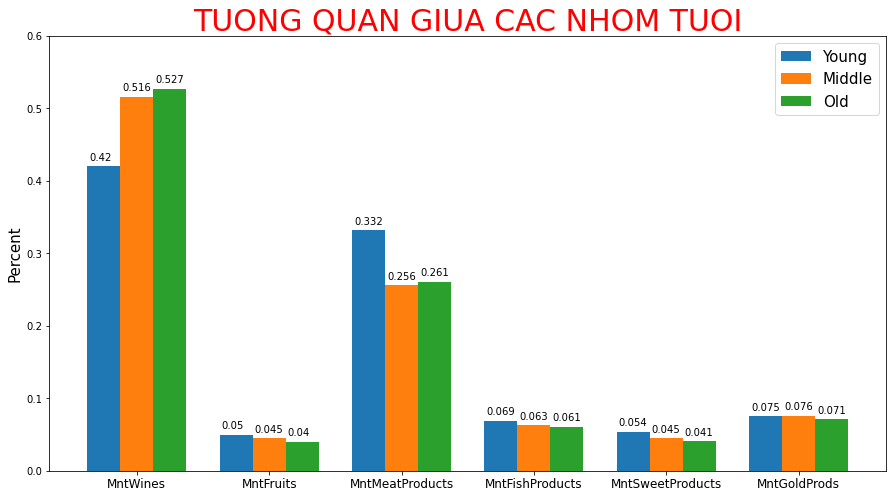

In [38]:
plt.figure(figsize = (15,8))
bar1 = barplot(youth_customer_df, 'Young',0)
bar2 = barplot(middle_customer_df, 'Middle',1)
bar3 = barplot(old_customer_df, 'Old',2)

plt.xticks(ticks = np.arange(6)+width, labels = prods, fontsize = 12)
plt.ylabel('Percent', fontsize = 15)
plt.title('TUONG QUAN GIUA CAC NHOM TUOI', fontsize = 30, color = 'r')
plt.legend(prop={'size': 15})
plt.show()

### Nhận xét: 
1. Tập khách hàng trung niên (từ 36-60) chiếm tỷ lệ cao nhất trong khảo sát này, vì vậy chúng ta phải tập trung vào việc bán các sản phẩm phù hợp với nhu cầu của nhóm tuổi này.
2. Có thể quan sát được rằng tất cả khách hàng được khảo sát trong dữ liệu đều chi phần lớn thu nhập cho rượu vang (hay đồ uống có cồn), nhóm tuổi càng cao thì có xu hướng chi tiêu cho sản phẩm này cao hơn. Do đó các công ty sản xuất rượu có thể dễ dàng hơn trong việc tiếp cận khách hàng của mình.
3. Chi tiêu cho mua thực phẩm (như thịt, cá, trái cây, đồ ngọt) có xu hướng giảm dần qua từng nhóm tuổi từ trẻ đến già, có vẻ như càng lớn tuổi các khách hàng của chúng ta có xu hướng chi tiêu vào những sản phẩm mang tính tận hưởng là chính (như rượu, đồ uống có cồn, ...) hơn là các loại thực phẩm trong bữa ăn hằng ngày. Do đó để có thể lấy thị phần, các công ty sản xuất thực phẩm này cần phải thay đổi chiến lược tiếp cận của mình để có thể có được nhiều khách hàng mua sản phẩm của mình 

### Câu hỏi 2:

Tìm hiểu đặc điểm của từng nhóm người tiêu dòng theo tổng lượng mua hàng, đâu là những đặc điểm của họ, giữa những nhóm người dùng này có gì khác nhau?  
-> Trả lời được câu hỏi này giúp công ty hiểu hơn về người tiêu dùng của họ, tại sao một nhóm người lại mua nhiều trong khi nhóm khác lại không mấy khi mua hàng của công ty họ.

Các bước trả lời câu hỏi: 
- Chia df thành 3 df nhỏ: high_spending: chi cao hơn 800, avg_spending: chi từ 200 đến 800, low_spending: chi ít hơn 200
- Tính toán các nhóm này theo 5 thuộc tính: Age, InRelationship, Income, Kids, và Education. 
- Trực quan hoá 3 nhóm khách hàng theo từng thuộc tính.

In [39]:
df = customer_df
high_spending = df[df.Expenses>800] 
avg_spending = df[ (df.Expenses>=200) & (df.Expenses<= 800)]
low_spending = df[df.Expenses<200]

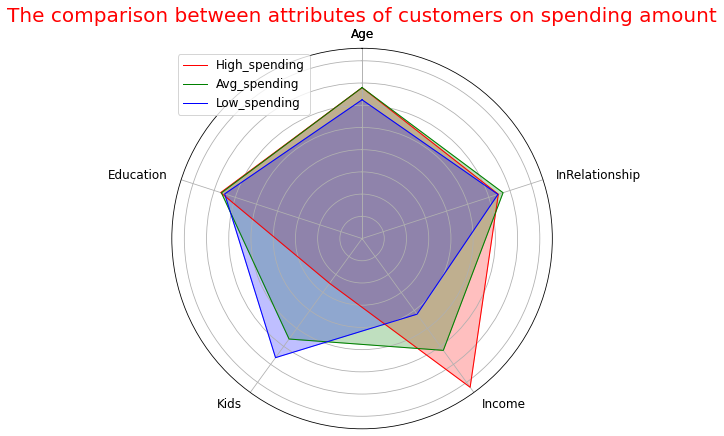

In [40]:
# function draw outline and fill
def add_to_radar(spending_rank, color, label):
  values = []

  age =  spending_rank.Age.values
  max_age = 80
  values.append(age.mean()/max_age)

  Live_together_count=  spending_rank.Marital_Status.value_counts()

  values.append(Live_together_count['InRelationship'] / Live_together_count.sum())

  income =  spending_rank.Income.mean()
  max_income = 85000
  values.append(income/max_income)

  kidhome =  spending_rank.Kids.mean()
  max_kids = 2
  values.append(kidhome/max_kids)

  education = spending_rank.Education.value_counts()

  columns = ['PhD', 'Master', '2n Cycle', 'Graduation', 'Basic']
  score = [4,3,2.5,2,1]

  edu_val = 0 
  sum_ppl = education.sum()
  for i in range(len(columns)):
    edu_val += education[columns[i]]*score[i]/4/sum_ppl

  values.append(edu_val)

  values += values[:1]


  ax.plot(angles, values, color=color, linewidth=1, label=label)
  ax.fill(angles, values, color=color, alpha=0.25)


# Each attribute we'll plot in the radar chart.
labels = ['Age', 'InRelationship', 'Income', 'Kids','Education']


# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

# Draw the outline of our data.

add_to_radar(high_spending, 'red', 'High_spending')
add_to_radar(avg_spending, 'green', 'Avg_spending')
add_to_radar(low_spending, 'blue', 'Low_spending')


ax.legend(loc='upper left')

# print(angles)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
labels += labels[:1]
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize = 12)


# Hide label
ax.set_yticklabels([])

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

ax.set_title('The comparison between attributes of customers on spending amount', fontsize = 20, color = 'r')
ax.legend(fontsize = 12, loc = 'upper left')
plt.show(); 

##### Nhận xét: 
- Những người mua hàng thường xuyên có thu nhập trên trung bình và có từ 1 đến 2 con. 
- Những người mua hàng nhiều thường sẽ không có con và có thu nhập cao hơn trung bình.
- Những người ít mua hàng nhất là nhóm người cú thu nhập thấp và đã có con. Có thể do giá của các sản phẩm là quá cao so với thu nhập trung bình của nhóm người tiêu dùng này chăng hay là do công ty không có các sản phẩm dành cho trẻ em để phục vụ nhu cầu cho nhóm người tiêu dùng này?

#### Câu hỏi kéo theo: 
Những người có mua hàng thường xuyên, nhiều có xu hướng mua những sản phẩm nào ?  
-> Giúp cho công ty hiểu hơn về những loại sản phẩm nào đang bán chạy trên thị trường và những sản phẩm nào còn chưa phố biến.

Các bước trả lời câu hỏi: 
- Bước 1: Với mỗi nhóm khách hàng, tính số lượng mua hàng cho từng loại sản phẩm.
- Bước 2: Vẽ biểu đồ so sánh.

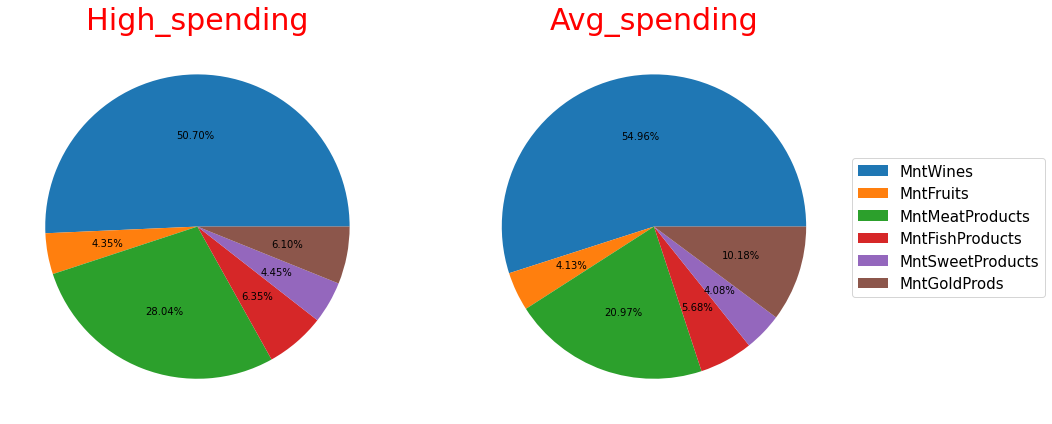

In [41]:
def make_pie_chart(ax, df, name):
    values = df.iloc[:,7:13].mean()
    ax.pie(values, autopct='%1.2f%%')
    # ax.set_ticks(range(6))
    # ax.set_ticklabels(labels = labels, fontsize = 25)
    ax.set_title(name, fontsize = 30, color = 'r')

fig, (ax1, ax2) = plt.subplots( 1,2,figsize=(15,7),subplot_kw=dict(aspect="equal"))

make_pie_chart(ax1, high_spending, 'High_spending')
make_pie_chart(ax2, avg_spending, 'Avg_spending')
labels = df.iloc[:,7:13].columns
# ax1.legend(labels, loc = 'upper right', fontsize = 12)
ax2.legend(labels,bbox_to_anchor = (1, 0.7), fontsize = 15)
plt.show();

##### Nhận xét:
- Về cơ bản thì thành phần mua hàng của cả hai nhóm người tiêu dùng trên cũng không khác nhau lắm và cũng giống với kết quả của khảo xác  khách hàng theo nhóm tuổi trước đó. Cả 2 nhóm đều có xu hướng mua rất nhiều rượu (trên 50%), và mua lượng lớn các sản phẩm từ thịt (20-30%). 
- Với việc rượu được người dùng tiêu thụ nhiều như vậy và đa phần trong số họ có thu nhập trên trung bình, liệu có nên đưa ra dòng sản phẩm thượng hạng để khai thác thêm từ nhóm người này?
- Nguyên nhân vì đâu mà khách hàng ít quan tâm đến các sản phẩm như trái cây, cá, và đồ ngọt, do chất lượng sản phẩm của công ty hay là do một nguyên nhân nào đó khác? Chiến lược nào cần đưa ra để cải thiện vấn đề này?
- Với lượng data này chúng ta hiện tại chưa thể trả lời được tất cả các câu hỏi về thói quen mua hàng của người tiêu dùng nhưng đủ để chúng ta tạo ra một vài vấn đề từ đó tiếp tục thu thập thông tin như: giá bán của từng món hàng, số lượng các sản phẩm của công ty cho mỗi loại hàng, ý kiến phản hồi của khách hàng về sản phẩm/ nhóm sản phẩm của công ty,... để có thể tìm hiểu rõ hơn về nguyên nhân tạo nên thói quen mua hàng của người yêu dùng.

## Nhìn lại quá trình làm đồ án

#### Hồ Hoàng Duy

- Khó khăn: 
1. Học kỳ này do học online nên việc làm đồ án các môn nói chung và môn học này gặp một số khó khăn trong việc trao đổi cũng như làm việc nhóm, môi trường online (từ việc giao tiếp, cũng như họp team qua các ứng dụng) làm cho sự tương tác giữa mỗi người có thể không thuận lợi từ lúc bắt đầu.
2. Việc sử dụng git/github để quản lý bài làm khiến cho em gặp trục trặc trong việc merge cũng như xử lý conflict, tuy nhiên nó cũng giúp bản thân hiểu về quy trình làm việc thực tế.
3. Em tự thấy những câu hỏi mình đặt ra chưa đủ thú vị nên dẫn đến trong phần của em chỉ có thể đặt được 1 câu hỏi tâm đắc. Em sẽ cố gắng suy nghĩ một cách thực tế hơn thông qua bài làm của các bạn khác
- Học được từ đồ án:
1. Rút kinh nghiệm trong việc nhận định và đặt câu hỏi mang ý nghĩa, hiểu rõ hơn công việc phân tích dữ liệu một cách sâu sắc.
2. Nếu có nhiều thời gian, em sẽ quan sát kỹ dữ liệu của mình hơn và khai thác các thuộc tính còn lại.

#### Đào Quốc Phong

- Khó khăn:

1. Hợp nhất .ipynb khá khó. Có công cụ hỗ trợ nhưng việc sử dụng cũng gặp khó khăn với việc chỉnh sửa các conplict bị mất một thời gian.
2. Việc tìm kiếm dữ liệu và đặt câu hỏi cho dữ liệu tiến trình vẫn chưa tốt lắm. Tụi em nghĩ là đã tìm thấy dữ liệu tốt nhưng cuối cùng vẫn không đặt được câu hỏi tốt cho dữ liệu.

- Học được từ đồ án:

1. Code không hẳn là việc quan trọng nhất trong quá trình khoa học dữ liệu. Dữ liệu và câu hỏi cũng như nhận được rút ra từ việc trả lời câu hỏi cũng rất quan trọng.
2. Cần cẩn thận trong việc thu thập dữ liệu, cũng như xử lý dữ liệu vì nó có thể làm câu trả lời của chúng tôi bị sai. 
3. Quá trình khoa học dữ liệu không phải là một quá trình dễ dàng và theo một trình tự nhất định, đôi khi chúng ta phải quay lại một bước nào đó và bắt đầu lại. Đôi khi chúng ta không thể trả lời được hết tất cả câu hỏi và phải tiến hành thu thập dữ liệu đợt hai để có thể tiếp tục quá trình tìm hiểu.

## Tài liệu tham khảo

- Video record, slide bài giảng, file notebook demo của thầy Kiên
- Documentation của các thư viện trong Python đã import (matplotlib, pandas, numpy, seaborn)
- Link [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis) của file dữ liệu
- Vẽ radar plot https://www.pythoncharts.com/matplotlib/radar-charts/
- Diễn đàn code, tutorial code: Stackoverflow, w3schools,... 